# Data Structure - Heaps

A type of binary tree; There are multiple different variations of heaps


__Binary Heap__: Parent node with two child nodes
* Must be a complete binary tree (all the internal level tree nodes must completely filled, not required for the leaf node level; overall tree is balanced & skewed to the left)
* Binary search order (less than parent on the left and greater than parent on the right) isn't required
* Usually implemented with an array
* Can be referred to as or used to implement priority queues (queues where elements, regardless of order, are popped off first based on priority)
    * MIN operation: low priority elements are popped off first
    * MAX operation: high priority elements are popped off first (usually the most commonly implemented)
* Used for the heapsort algorithm and several graph algorithms (e.g. Dijkstra's algorithm --> to find shortest path b/w nodes in a graph)


Types of heaps ("heap property"):
* __*Max Heap*:__ The parent node has to be greater than or equal to the child node(s); nodes *generally* get SMALLER as you go down the tree
 * __*Min Heap*:__ The parent node has to be less than or equal to the child node(s); nodes *generally* get BIGGER as you go down the tree


Other heaps include but aren't limited to:
* __*Fibonacci Heap*:__ a collection of min or max heap trees, kind of like more flexible binominal heaps; makes use of Fibonacci numbers and have a O(1) find minimum node time complexity
* __*Binomial Heap*:__ behaves likes a priority queue & is similar to a binary heap but allows pairs of heaps to be merged
* __*Leftist Heap*:__ very similar to a binomial heap, but is heavily skewed to the left so that the right descendants of each node have a lower "rank" (distance to the nearest leaf node)

**********

### Min Heap (used by Python `heapq` library)
* Portrayed as an array
* To find the find specific nodes in an array:
    * PARENT NODE to LEFT: (Current index position * 2) + __1__ (e.g. INDEXES: 0 to 1, 2 to 5, 3 to 7)
    * PARENT NODE to RIGHT: (Current index position * 2) + __2__ (e.g. INDEXES: 0 to 2, 2 to 6, 3 to 8)
    * LEFT NODE (ODD) to PARENT: `int`( [(Current index position - 2) / 2] + 0.5 )
    * RIGHT NODE (EVEN) to PARENT: (Current index position - 2) / 2
    

In [50]:
left_index = 10
parent = ((left_index - 2) / 2)

print(parent)

4.0


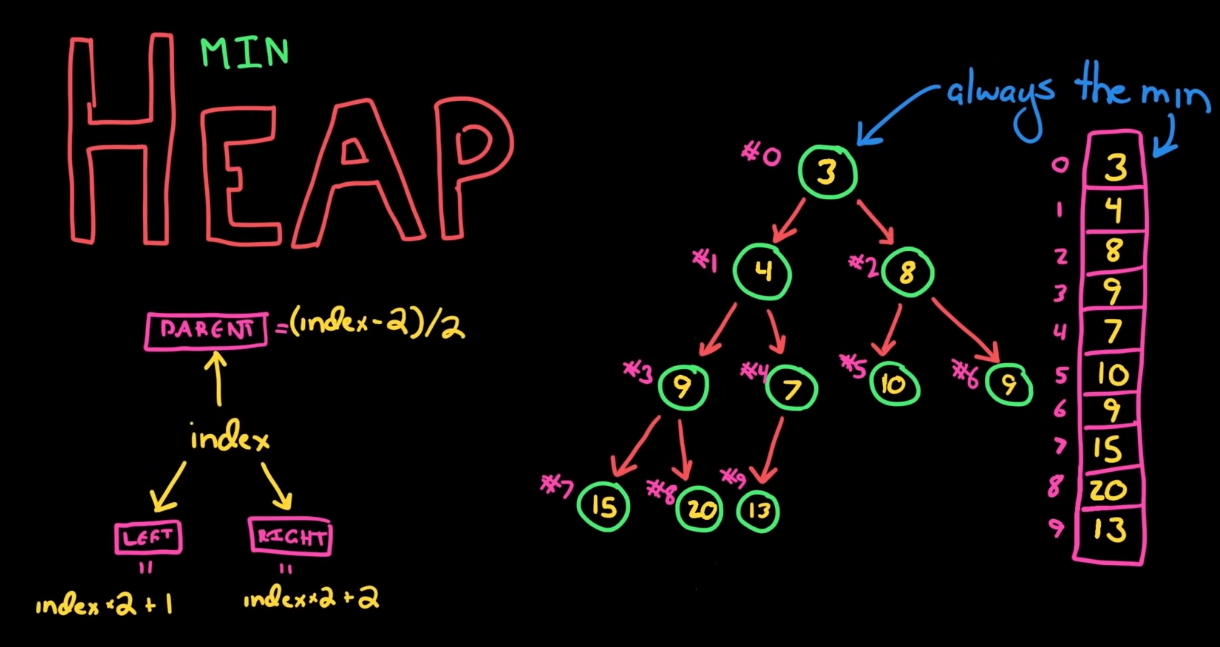

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/heaps-min.png", width=700)

### Binary Min Heap Node Implementation

In [77]:
class MinHeap:

    ## CONSTRUCTOR
    def __init__(self):
        self.heapList = []
        self.heapList_length = len(self.heapList)


    ################   HELPER METHODS   ################

    ### GETTERS: INDEX
    def getLeftChildIndex(self, parentIndex):
        try:
            return (parentIndex * 2) + 1 # add 1 for LEFT CHILD
        except:
            raise Exception("Not a valid index number")

    def getRightChildIndex(self, parentIndex):
        try:
            return (parentIndex * 2) + 2 # add 2 for RIGHT CHILD
        except:
            raise Exception("Not a valid index number")

    def getParentIndex(self, childIndex):
        try:
            # If 1st element (root)
            if childIndex == 0:
                return None

            # If index is even
            elif childIndex % 2 == 0:
                return int( (childIndex - 2) / 2 )

            # If index is odd
            else:
                return int( ((childIndex - 2) / 2) + 0.5 )
        except:
            raise Exception("Not a valid index number")

    ### CHECK IF EXISTS
    def hasLeftChild(self, currentIndex):
        if self.getLeftChildIndex(currentIndex) < self.heapList_length:
            return True
        else:
            return False

    def hasRightChild(self, currentIndex):
        if self.getRightChildIndex(currentIndex) < self.heapList_length:
            return True
        else:
            return False

    def hasParent(self, currentIndex):
        parentIndex = self.getParentIndex(currentIndex)

        if parentIndex == 0:
            return False

        elif parentIndex < self.heapList_length:
                return True

        else:
            return False

    ### GETTERS: VALUE
    def getLeftChild(self, currentIndex):
        if self.hasLeftChild(currentIndex):
            return self.heapList[self.getLeftChildIndex(currentIndex)]
        else:
            return "This current node, " + str(currentIndex) + " does not have a left child"

    def getRightChild(self, currentIndex):
        if self.hasRightChild(currentIndex):
            return self.heapList[self.getRightChildIndex(currentIndex)]
        else:
            return "This current node, " + str(currentIndex) + " does not have a right child"

    def getParent(self, currentIndex):
        if self.hasParent(currentIndex):
            return self.heapList[self.getParentIndex(currentIndex)]
        else:
            return "This current node, " + str(currentIndex) + " does not have a parent"


    ## Swaps elements from one index to another
    def swap(self, index1, index2):
        try:
            temp = self.heapList[index1]

            self.heapList[index1] = self.list[index2]
            self.heapList[index2] = temp
        except:
            raise Exception("Not a valid index number")
        

    #####################################################################################


    ## retrieves (but doesn't pop) 1st element in list (which is the minimum element in the heap)
    def peekMin(self):
        if self.heapList.length == 0:
            return "Heap is completely empty"
        else:
            return self.heapList[0]



    ## REMINDER: Min heap nodes generally get bigger as you go down the heap tree; parents < children



    ## Time Complexity for Heapify methods: AVERAGE --> O(log n), WORST --> O(n)

    ## From bottom to top: Rearrange binary heap list, swapping parent nodes to child nodes if necessary
    ## After heapPush() [last element in list --> start at index 0]
    def minHeapifyPush(self):
        currentIndex = self.heapList_length - 1 # start at END (bottom)

        # Keep looping if:
            # the current node (currentIndex) has a parent node, AND
            # the parent node is LARGER than the current node (we want parent < current child)
        while( self.hasParent(currentIndex) and self.getParent(currentIndex) > self.heapList[currentIndex] ):
            # if parent > child in min heap --> swap parent to child (current)
            self.swap(self.getParentIndex(currentIndex), currentIndex)

            # continue up the heap tree, parent by parent
            currentIndex = self.getParentIndex(currentIndex)


    ## Rearrange heap list to follow the order of a binary heap ("heap property") after adding a new element at the end
    ## After heapPop() [first element in list --> start at last index]
    def minHeapifyPop(self):
        currentIndex = 0 # start at BEGINNING (top)

        # Keep looping if a left child exists
            # NOTE: Since heaps are complete binary trees, they are skewed to the left, so there is no need to base while loop condition
            # on whether the current node has a right child or not since all of the leaves will be lined up from left to right
        while self.hasLeftChild(currentIndex):
            # initially, set smaller child index variable to the left child
            smallerChildIndex = self.getLeftChildIndex(currentIndex)

            # If it right child also exists for the current node, then find the smaller node between the left & right and set it to the
            # smaller child index variable
            if self.hasRightChild(currentIndex):
                smallerChildIndex = min(self.getLeftChildIndex(currentIndex), self.getRightChildIndex(currentIndex))

            # If the current index (parent) is less than the minimum child node, then we're good, so break out of loop
            if self.heapList[currentIndex] < self.heapList[smallerChildIndex]:
                break
            # If not, swap parent (current) to child
            else:
                self.swap(currentIndex, smallerChildIndex)

            # After swapping, set the current index to the index of where the smallest child used to be
            currentIndex = smallerChildIndex



    ## Remove min (root) element, rearrange to conform with heap property (min in this case) & return list
    def heapPop(self):
        if self.heapList.length == 0:
            return "Heap is completely empty"
        
        # Setting the min (root) value in the list to the last element in the list
        self.heapList[0] = self.heapList[self.heapList_length - 1]

        # Remove last element to avoid a duplicate element
        self.heapList.pop()

        # Rearrange heap list to follow the order of a binary heap ("heap property") after removing min (root) element
        self.minHeapifyPop()

        # return the updated list
        return self.heapList


    # Add new element at the end of the list, rearrange to conform with heap property (min in this case)
    def heapPush(self, item):
        # Add new element to the very end of the list
        self.heapList.append(item)

        # Rearrange heap list to follow the order of a binary heap ("heap property") after adding a new element at the end
        self.minHeapifyPush()


    # Invokes heapPush but will allow you to pass in a pre-populated list
    def heapPushList(self, list):
        for item in list:
            self.heapPush(item)

        return "Added " + str(len(list)) + " elements to the min heap tree/list"


    # Return heap list elements
    def __repr__(self):
        return " ".join(self.heapList)

In [78]:
heap1 = MinHeap()

In [79]:
ls = [1,2,3,4,5]

heap1.heapPushList(ls)

'Added 5 elements to the min heap tree/list'

In [ ]:
heap1

In [28]:
ls = [1,2,3,4,5]

tst = MinHeap(ls)

tst.list_length

#print(tst.getListLength())

5